In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-2-0269635a80f9>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [ ]:
reviews_df = pd.read_csv('reviews.tsv',sep = '\t')

In [ ]:
products_df = pd.read_csv('products.tsv',sep = '\t') 


In [ ]:
products_df.columns

Index(['product_id', 'product_name', 'product_company', 'Matrial', 'Qty',
       'Color', 'Unnamed: 6', 'Age_grp', 'Unnamed: 8', 'Unnamed: 9',
       'product_price', 'price_currency', 'product_availability',
       'product_url', 'source_url'],
      dtype='object')

In [ ]:
reviews_df.columns

Index(['abuseCount', 'customerNickname', 'helpfulNo', 'helpfulYes', 'id',
       'imagesCount', 'languageCode', 'postedDate', 'productId',
       'profileInfo.ugcSummary.answerCount',
       'profileInfo.ugcSummary.reviewCount', 'ratingValue', 'reviewText',
       'reviewTitle', 'reviewed', 'score', 'languageCode.1',
       'translation.reviewText', 'translation.reviewTitle'],
      dtype='object')

In [ ]:
products_df

In [ ]:
reviews_df['translation.reviewText']

0       NaN                                                                                                    
1       The grandson really liked it. Comfortable mask.                                                        
2       NaN                                                                                                    
3       A thin mask that is pleasant to the body. I liked the colors too                                       
4       Great mask! It suited me perfectly. There is a slight smell. It looks decent. The quality is excellent.
                                                         ...                                                   
3844    NaN                                                                                                    
3845    NaN                                                                                                    
3846    Not particularly recommended                                                                    

In [ ]:
reviews_df_grp_prd= reviews_df.groupby(['productId'])['productId'].count()

In [ ]:
products_reviews_df = pd.merge(left=products_df,right=reviews_df, how='left',left_on=['product_id'],right_on=['productId'])

In [ ]:
products_reviews_df

In [ ]:
products_reviews_df.to_excel("product_review.xlsx")

In [ ]:
reviews_df_grp_prd= products_reviews_df.groupby(['product_name'])['product_name'].count().reset_index(name="count")
reviews_df_grp_prd = reviews_df_grp_prd.sort_values(by=['count'],ascending=False)

In [ ]:
reviews_df_grp_prd_id= products_reviews_df.groupby(['product_id'])['product_id'].count().reset_index(name="count")
reviews_df_grp_prd_id = reviews_df_grp_prd_id.sort_values(by=['count'],ascending=False)

In [ ]:
reviews_df_grp_prd_id

,product_id,count
13,101955,658
4,100237,530
1,99830,475
16,102734,337
0,99829,304
11,101692,259
6,100837,225
12,101774,168
5,100541,145
18,103205,126


In [ ]:
top_product_id = products_reviews_df.groupby(['product_id'])['product_id'].count().reset_index(name="count").sort_values(by=['count'],ascending=False).head(5)['product_id']

In [ ]:
products_reviews_df

In [ ]:
top_product_id.to_list()

[101955, 100237, 99830, 102734, 99829]

In [ ]:
products_reviews_df.columns

Index(['product_id', 'product_name', 'product_price', 'price_currency',
       'product_availability', 'product_url', 'source_url', 'abuseCount',
       'customerNickname', 'helpfulNo', 'helpfulYes', 'id', 'imagesCount',
       'languageCode', 'postedDate', 'productId',
       'profileInfo.ugcSummary.answerCount',
       'profileInfo.ugcSummary.reviewCount', 'ratingValue', 'reviewText',
       'reviewTitle', 'reviewed', 'score', 'languageCode.1',
       'translation.reviewText', 'translation.reviewTitle'],
      dtype='object')

In [ ]:
products_reviews_df['product_id'].isin(['101955'])==True

0       False
1       False
2       False
3       False
4       False
        ...  
3844    False
3845    False
3846    False
3847    False
3848    False
Name: product_id, Length: 3849, dtype: bool

In [ ]:
products_reviews_df.head()

In [ ]:
products_df[products_df.product_id.isin(top_product_id.to_list())]

,product_id,product_name,product_price,price_currency,product_availability,product_url,source_url
2,101955,"SunJoy, KN95, Professional Protective Disposab...",8.86,AUD,http://schema.org/InStock,https://au.iherb.com/pr/SunJoy-KN95-Profession...,https://au.iherb.com/c/protective-face-masks
4,102734,"Zidian, Disposable Protective Mask, 50 Pack",15.35,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Zidian-Disposable-Prot...,https://au.iherb.com/c/protective-face-masks
15,100237,"Kitsch, 100% Cotton Reuseable Face Masks, Leop...",17.72,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Kitsch-100-Cotton-Reus...,https://au.iherb.com/c/protective-face-masks
17,99830,"Kosette, Nano Reusable Face Protection Mask, M...",22.44,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Kosette-Nano-Reusable-...,https://au.iherb.com/c/protective-face-masks
19,99829,"Kosette, Nano Reusable Face Protection Mask, L...",22.44,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Kosette-Nano-Reusable-...,https://au.iherb.com/c/protective-face-masks


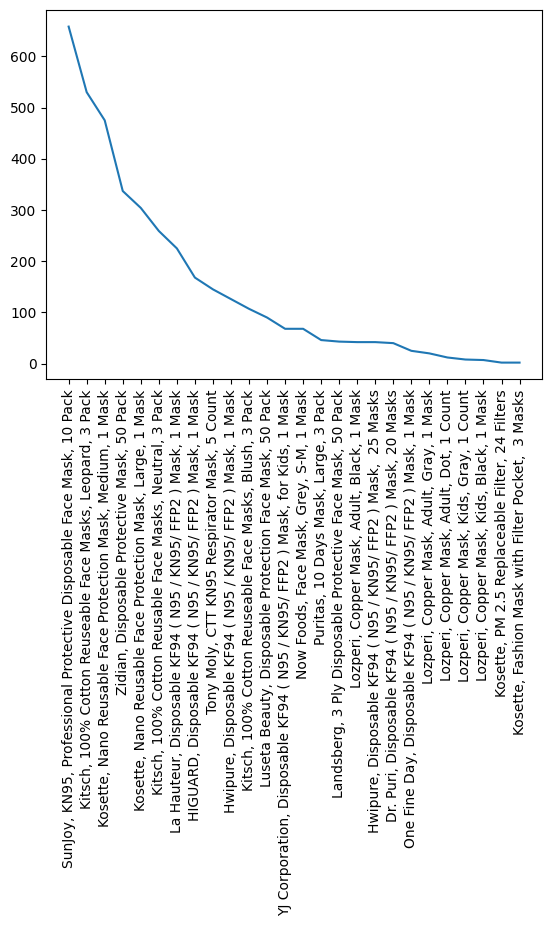

In [ ]:
plt.plot(reviews_df_grp_prd['product_name'], reviews_df_grp_prd['count'])
plt.xticks(rotation = 90)
plt.show()

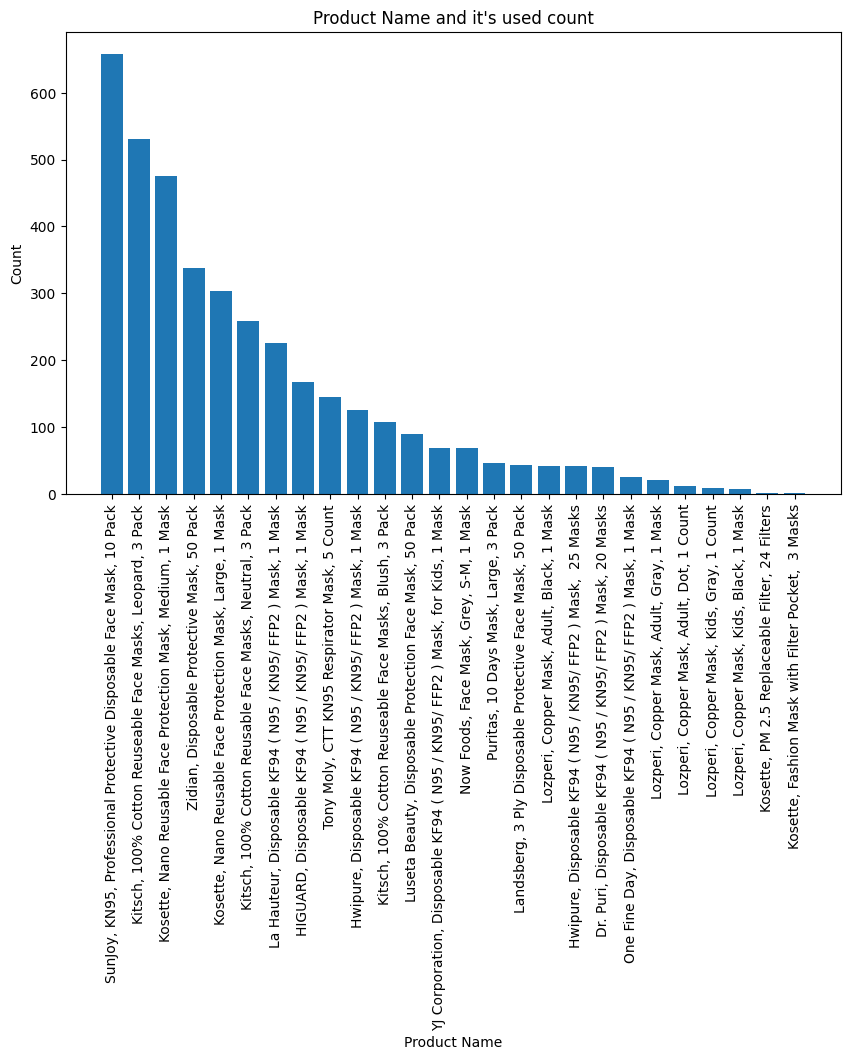

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(reviews_df_grp_prd['product_name'], reviews_df_grp_prd['count'])
plt.xticks(rotation=90);
plt.xlabel("Product Name")
plt.ylabel("Count")
plt.title("Product Name and it's used count")
plt.show()

AttributeError: ignored

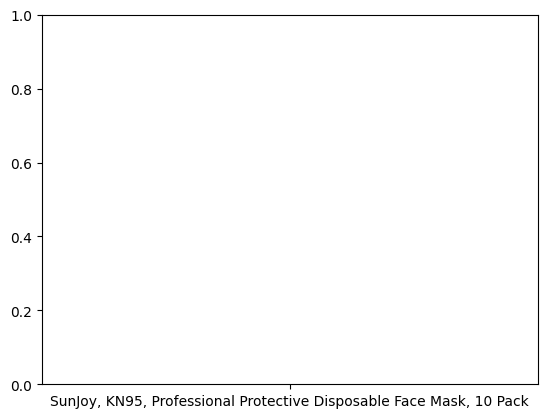

In [ ]:
plt.bar(reviews_df_grp_prd['product_name'], 
        reviews_df_grp_prd['count'], 
        color ='maroon', width = 0.4,
        )

In [ ]:
products_df.columns

Index(['product_id', 'product_name', 'product_price', 'price_currency',
       'product_availability', 'product_url', 'source_url'],
      dtype='object')

In [ ]:
products_df.product_name.str.split(',', n = 1, expand = True).iloc[0]

0                                              Hwipure
1     Disposable KF94 ( N95 / KN95/ FFP2 ) Mask, 1 ...
Name: 0, dtype: object

In [ ]:
"Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) Mask, 1 Mask"

In [ ]:
name = products_df.product_name.str.split(',', n = -1, expand = True)

In [ ]:
name

,0,1,2,3,4
0,Hwipure,Disposable KF94 ( N95 / KN95/ FFP2 ) Mask,1 Mask,None,None
1,HIGUARD,Disposable KF94 ( N95 / KN95/ FFP2 ) Mask,1 Mask,None,None
2,SunJoy,KN95,Professional Protective Disposable Face Mask,10 Pack,None
3,Lozperi,Copper Mask,Adult,Black,1 Mask
4,Zidian,Disposable Protective Mask,50 Pack,None,None
5,La Hauteur,Disposable KF94 ( N95 / KN95/ FFP2 ) Mask,1 Mask,None,None
6,YJ Corporation,Disposable KF94 ( N95 / KN95/ FFP2 ) Mask,for Kids,1 Mask,None
7,Hwipure,Disposable KF94 ( N95 / KN95/ FFP2 ) Mask,25 Masks,None,None
8,Lozperi,Copper Mask,Adult,Gray,1 Mask
9,Puritas,10 Days Mask,Large,3 Pack,None


In [ ]:
products_df["manufacturer"]= name[0]
# making separate last name column from new data frame
products_df["type"]= name[1]
products_df["qty"]= name[2]
# Dropping old Name columns
#data.drop(columns =["Name"], inplace = True)

In [ ]:
reviews_df['translation.reviewText']

0                                                     NaN
1         The grandson really liked it. Comfortable mask.
2                                                     NaN
3       A thin mask that is pleasant to the body. I li...
4       Great mask! It suited me perfectly. There is a...
                              ...                        
3844                                                  NaN
3845                                                  NaN
3846                         Not particularly recommended
3847                                           Stickiness
3848                                                  NaN
Name: translation.reviewText, Length: 3849, dtype: object

In [ ]:
reviews_df.to_excel("aa.xlsx")

In [ ]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 16.7 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
reviews_df['translation.reviewText']

In [ ]:
data = ["I love you", "I hate you"]
sentiment_pipeline(data)

[{'label': 'POSITIVE', 'score': 0.9998656511306763},
 {'label': 'NEGATIVE', 'score': 0.9991129040718079}]

In [ ]:
reviews_df['reviewTextConsolidate'] = np.where(reviews_df['translation.reviewText'].isnull(), reviews_df['reviewText'], reviews_df['translation.reviewText'])

In [ ]:
#E_reviews = reviews_df[reviews_df['languageCode'] != 'en-US']
reviewText = reviews_df['reviewTextConsolidate'].values.tolist()
#df['languageCode'] == 'en-US'

In [ ]:
reviews_df['sentiment']=sentiment_pipeline(reviewText)

In [ ]:
data1 = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data1)

,col_1,col_2
0,3,a
1,2,b
2,1,c
3,0,d


In [ ]:
pd.DataFrame.from_dict(data1)

,0
0,I love you
1,I hate you


In [ ]:
reviews_df.head()

,abuseCount,customerNickname,helpfulNo,helpfulYes,id,imagesCount,languageCode,postedDate,productId,profileInfo.ugcSummary.answerCount,...,reviewText,reviewTitle,reviewed,score,languageCode.1,translation.reviewText,translation.reviewTitle,reviewTextConsolidate,sentiment,sentimentval
0,0,iHerb Customer,0,6,05c2b17e-c28d-4792-930d-27e787d8d4ad,1,en-US,2021-01-27T09:04:10.569Z,103839,0.0,...,The mask quality and the color is good. It fit...,Dotted Pattern Is Nice,True,1.614071e+09,en-US,NaN,NaN,The mask quality and the color is good. It fit...,"{'label': 'POSITIVE', 'score': 0.9998726844787...",POSITIVE
1,0,iHerb Customer,0,0,80e44af8-2edf-4b81-a80a-7e7888d03cc0,0,ru-RU,2021-02-07T00:56:39.055Z,103839,0.0,...,Внуку очень понравилось. Удобная маска.,Прекрасно!,False,1.612659e+09,ru-RU,The grandson really liked it. Comfortable mask.,en-US,The grandson really liked it. Comfortable mask.,"{'label': 'POSITIVE', 'score': 0.9996812343597...",POSITIVE
2,0,iHerb Customer,0,0,9a76e047-21e4-4da3-8b50-9d2396519b6b,0,en-US,2021-02-06T21:40:02.886Z,103839,0.0,...,Easy to put on & comfortable to wear.,Good,False,1.612648e+09,en-US,NaN,NaN,Easy to put on & comfortable to wear.,"{'label': 'POSITIVE', 'score': 0.9996705055236...",POSITIVE
3,0,InnaIgorevna,0,0,2890ac54-8707-418e-be3e-8d46231e3672,0,ru-RU,2021-02-05T16:29:28.906Z,103839,0.0,...,"Тонкая, приятная к телу маска. Расцветка тоже ...",Хорошо,False,1.612543e+09,ru-RU,A thin mask that is pleasant to the body. I li...,en-US,A thin mask that is pleasant to the body. I li...,"{'label': 'POSITIVE', 'score': 0.9997230172157...",POSITIVE
4,0,iHerb Customer,0,0,9db33354-0457-4efa-bc9c-b5f7ee0eff31,0,ru-RU,2021-02-05T09:43:42.367Z,103839,0.0,...,Отличная маска! Мне подошла идеально. Слегка е...,Прекрасно!,False,1.612518e+09,ru-RU,Great mask! It suited me perfectly. There is a...,en-US,Great mask! It suited me perfectly. There is a...,"{'label': 'POSITIVE', 'score': 0.9998606443405...",POSITIVE


In [ ]:
pd.DataFrame.from_dict(reviews_df['sentiment'])

,sentiment
0,"{'label': 'POSITIVE', 'score': 0.9998726844787..."
1,"{'label': 'POSITIVE', 'score': 0.9996812343597..."
2,"{'label': 'POSITIVE', 'score': 0.9996705055236..."
3,"{'label': 'POSITIVE', 'score': 0.9997230172157..."
4,"{'label': 'POSITIVE', 'score': 0.9998606443405..."
...,...
3844,"{'label': 'POSITIVE', 'score': 0.9993047714233..."
3845,"{'label': 'POSITIVE', 'score': 0.9997506737709..."
3846,"{'label': 'NEGATIVE', 'score': 0.9997403025627..."
3847,"{'label': 'NEGATIVE', 'score': 0.9993042945861..."


In [ ]:
reviews_df['sentimentval'] = reviews_df['sentiment'].map(lambda x: x['label'],
               na_action=None)

In [ ]:
reviews_df['reviewTextConsolidate'][100],reviews_df['sentimentval'] [100]

("The reason why i gave 3 stars is the masks looks soft, it wasn't and some were smaller than others. Not comfortable ",
 'NEGATIVE')

In [ ]:
reviews_df[reviews_df['productId'] == 104023].groupby(['sentimentval'])['productId'].count().reset_index(name="count")
#df[df['customerNickname'] == 'Erez Opincaru'].reviewText.tolist()

,sentimentval,count
0,NEGATIVE,1
1,POSITIVE,1


In [ ]:
aa = reviews_df.groupby(['productId'])['productId'].count().reset_index(name="count").sort_values(by=['count'],ascending=False)['productId']
aa

13    101955
4     100237
1      99830
16    102734
0      99829
11    101692
6     100837
12    101774
5     100541
18    103205
10    101691
8     100840
14    102455
3     100234
19    103743
9     101029
20    103838
17    103204
2     100099
15    102522
7     100839
22    103840
21    103839
24    103842
23    103841
25    104022
26    104023
Name: productId, dtype: int64

In [ ]:
reviews_df.groupby(['productId','sentimentval'])['productId'].count().reset_index(name="count")

,productId,sentimentval,count
0,99829,NEGATIVE,66
1,99829,POSITIVE,238
2,99830,NEGATIVE,108
3,99830,POSITIVE,367
4,100099,NEGATIVE,19
5,100099,POSITIVE,22
6,100234,NEGATIVE,12
7,100234,POSITIVE,37
8,100237,NEGATIVE,138
9,100237,POSITIVE,392
